# Collection of the data

This notebook goal is to collect the data on yfinance. 
* I will collect the data for natural gas, oil and wheat. The process works for other type of stocks. 
* the __time range__ is between Septembre 2000 and January 2023 
* the __time frequency__ is in day, it will enable the user to analyse the stock in day, weeks, months,...

After that the data will be cleaned and saved into a csv file called Stocks.csv

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np

# select time range to analyse
# 1 janv has missing values, start to 01-09
start_date = "2000-09-01" 
end_date = "2023-01-01"

# Download the data
tickers = ["CL=F", "ZW=F", "NG=F"]
df = yf.download(tickers, start=start_date, end=end_date, interval="1d")["Adj Close"]

# Rename the colums tickers to more meaningfull names
columns = {"CL=F": "Crude Oil", "ZW=F": "Chicago Wheat", "NG=F" : "Natural Gas"}
df = df.rename(columns=columns)

df.head(15)


[*********************100%***********************]  3 of 3 completed


,Crude Oil,Natural Gas,Chicago Wheat
Date,,,
2000-09-01,33.380001,4.835,251.00
2000-09-05,33.799999,4.960,250.25
2000-09-06,34.950001,5.065,253.00
2000-09-07,35.330002,4.998,NaN
2000-09-08,33.700001,4.880,249.50
2000-09-11,35.099998,5.015,250.50
2000-09-12,34.200001,5.005,249.25
2000-09-13,33.799999,5.055,245.00
2000-09-14,34.099998,5.195,242.00


# Analyse the data

In [30]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

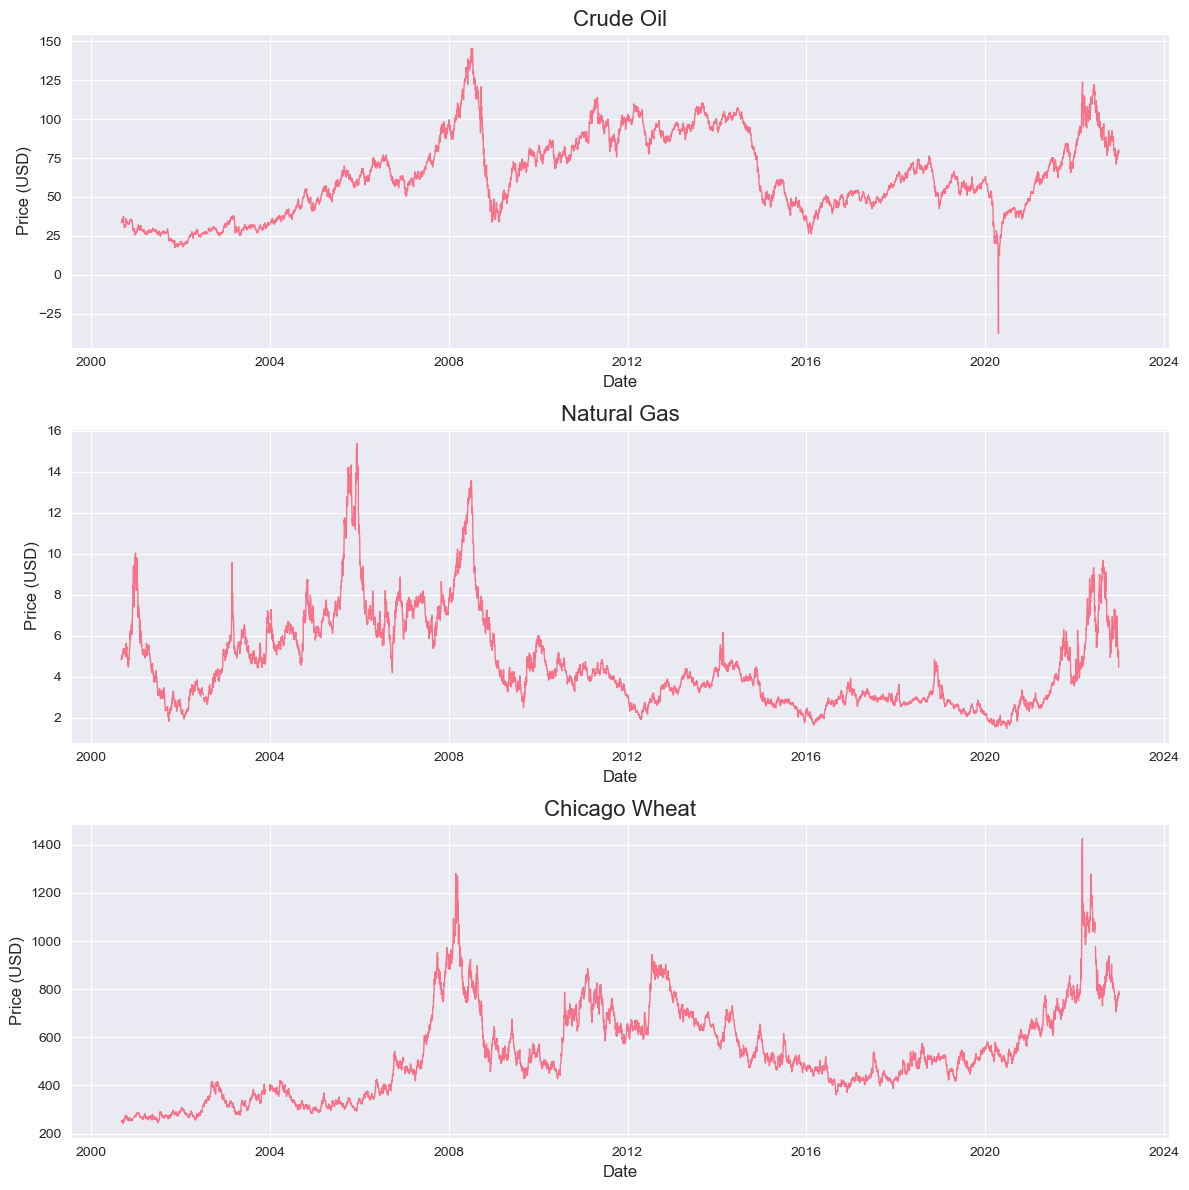

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data
sns.set_style("darkgrid")
sns.set_palette("husl", 3)

fig, axs = plt.subplots(3, 1, figsize=(12,12))

for i, col in enumerate(df.columns):
    axs[i].plot(df.index, df[col], linewidth=1)
    axs[i].set_title(col, fontsize=16)
    axs[i].set_xlabel("Date", fontsize=12)
    axs[i].set_ylabel("Price (USD)", fontsize=12)

plt.tight_layout()
plt.show()


# Clean the data

In [33]:
#crude oil have an obvious inconsistency on the plot, correct it
df[df["Crude Oil"]<10] = np.nan

#interpolate missing values (1% gas, 1% oil, 3% wheat)
df["Chicago Wheat"] = df["Chicago Wheat"].interpolate()
df["Natural Gas"] = df["Natural Gas"].interpolate()
df["Crude Oil"] = df["Crude Oil"].interpolate()

# Save the data

In [34]:
# Save the data to a csv file
df.to_csv("Prices.csv")